In [1]:
import os
import random
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movie_data.csv", sep=',')

In [3]:
df.head()

,movie_id,user_id,movie_rating,date,release_year,movie_title
0,1,1488844,3,2005-09-06,2003.0,Dinosaur Planet
1,1,822109,5,2005-05-13,2003.0,Dinosaur Planet
2,1,885013,4,2005-10-19,2003.0,Dinosaur Planet
3,1,30878,4,2005-12-26,2003.0,Dinosaur Planet
4,1,823519,3,2004-05-03,2003.0,Dinosaur Planet


In [4]:
df = df[df['movie_rating'] >= 4.0]
print('Shape of ratings dataset is: ',df.shape, '\n')

Shape of ratings dataset is:  (56919190, 6) 



In [5]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,movie_id,user_id,movie_rating,date,release_year,movie_title
45879925,8204,2257113,4,2004-04-20,1981.0,Das Boot
92861270,16452,1549706,5,2005-02-18,2000.0,Chocolat
69153715,12523,769555,4,2004-09-05,2002.0,All or Nothing
85376349,15151,1846168,4,2005-07-24,2004.0,Walking Tall
35173634,6287,416982,4,2004-06-26,1990.0,Pretty Woman


In [7]:
df = df.head(400000)

In [8]:
print("Nan values in our dataframe: ", sum(df.isnull().any()))
# Remove NaN values from the DataFrame
df = df.dropna()
print("Nan values in our dataframe: ", sum(df.isnull().any()))

Nan values in our dataframe:  1
Nan values in our dataframe:  0


In [9]:
df = df.reset_index()
df.head()

,index,movie_id,user_id,movie_rating,date,release_year,movie_title
0,45879925,8204,2257113,4,2004-04-20,1981.0,Das Boot
1,92861270,16452,1549706,5,2005-02-18,2000.0,Chocolat
2,69153715,12523,769555,4,2004-09-05,2002.0,All or Nothing
3,85376349,15151,1846168,4,2005-07-24,2004.0,Walking Tall
4,35173634,6287,416982,4,2004-06-26,1990.0,Pretty Woman


In [17]:
# save the filtered ratings
#df.to_csv('netflix_filtered_ratings.csv')

#to load the df from csv file
df = pd.read_csv('netflix_filtered_ratings.csv', nrows=50000)
df.head()

,Unnamed: 0,index,movie_id,user_id,movie_rating,date,release_year,movie_title
0,0,16957950,3282,2522130,4,2005-08-04,2004.0,Sideways
1,1,80474149,14507,69941,4,2005-07-02,1999.0,Any Given Sunday
2,2,50581251,9132,1801037,4,2004-05-28,1991.0,L.A. Story
3,3,64481419,11781,1531099,4,2004-10-14,1984.0,Indiana Jones and the Temple of Doom
4,4,62503240,11337,989873,4,2005-08-18,1999.0,American Pie


In [18]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)
print(df.shape)
df.head()

(50000, 6)


,movie_id,user_id,movie_rating,date,release_year,movie_title
0,3282,2522130,4,2005-08-04,2004.0,Sideways
1,14507,69941,4,2005-07-02,1999.0,Any Given Sunday
2,9132,1801037,4,2004-05-28,1991.0,L.A. Story
3,11781,1531099,4,2004-10-14,1984.0,Indiana Jones and the Temple of Doom
4,11337,989873,4,2005-08-18,1999.0,American Pie


In [19]:
pivot_df = df.pivot_table(index='user_id', columns='movie_id', values='movie_rating').fillna(0)
# print(pivot_df.isna().sum())   # print the number of missing values in each column
# print(pivot_df.isnull().sum()) # same as above

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [21]:
# Normalize the ratings matrix
norm_ratings_matrix = normalize(pivot_df)

# Perform K-means clustering on the normalized ratings matrix
kmeans = KMeans(n_clusters=10, random_state=0).fit(norm_ratings_matrix)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

In [22]:
# Get the predicted ratings for all users and movies
predicted_ratings = np.zeros_like(pivot_df)
for i in range(pivot_df.shape[0]):
    user_cluster = kmeans.predict(norm_ratings_matrix[i].reshape(1, -1))[0]
    predicted_ratings[i,:] = cluster_centers[user_cluster,:]

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(pivot_df, predicted_ratings))

# Calculate the MAE
mae = mean_absolute_error(pivot_df, predicted_ratings)

print(f"RMSE of K-means model: {rmse:.2f}")
print(f"MAE of K-means model: {mae:.2f}")

RMSE of K-means model: 0.06
MAE of K-means model: 0.00


In [23]:
# Get the predicted labels and the true labels
predicted_labels = kmeans.labels_
true_labels = np.zeros(pivot_df.shape[0])
for i in range(pivot_df.shape[0]):
    movie_ratings = pivot_df.iloc[i,:]
    if movie_ratings.sum() > 0:
        true_labels[i] = 1

# Calculate the ARI and NMI
ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index of K-means model: {ari:.2f}")
print(f"Normalized Mutual Information of K-means model: {nmi:.2f}")

Adjusted Rand Index of K-means model: 0.00
Normalized Mutual Information of K-means model: 0.00


In [63]:
pivot_df.index

Int64Index([    134,     301,     302,     305,     442,     481,     508,
                561,     602,     616,
            ...
            2649057, 2649059, 2649067, 2649120, 2649267, 2649285, 2649308,
            2649311, 2649323, 2649429],
           dtype='int64', name='user_id', length=43748)

In [87]:
# Get user clusters
user_clusters = kmeans.predict(pivot_df)

# Recommend movies for each user
recommended_movies = []

# Get user cluster
user_cluster = user_clusters[7]

# Find closest user in the same cluster
closest_user_id = pivot_df[kmeans.labels_ == user_cluster].index[0]

# Get movies rated highly by closest user but not by target user
top_rated_movies = pivot_df.loc[closest_user_id][pivot_df.loc[user_id] == 0].sort_values(ascending=False)

# Get movies rated by target user
target_user_movies = pivot_df.loc[user_id][pivot_df.loc[user_id] != 0].index

movies = top_rated_movies.index.difference(target_user_movies)

# Shuffle the index
shuffled_movies = movies.to_series().sample(frac=1).index

# Get top recommended movies
recommended_movies.extend(shuffled_movies[:10])

# Print recommended movies indices
print(recommended_movies)

<class 'pandas.core.indexes.numeric.Int64Index'>
[16922, 14766, 5672, 2009, 3728, 1697, 16005, 14480, 16384, 13660]


In [88]:
for movie in recommended_movies:
    print(df.loc[movie]['movie_title'])

What Women Want
A Murder of Crows
Along Came Polly
Minority Report
Big Daddy
Close Encounters of the Third Kind
Man on Fire
The Hand that Rocks the Cradle
Glory
Raising Arizona


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
ratings_array = scaler.fit_transform(pivot_df)

In [25]:
print(norm_ratings_matrix.shape)
print(df.shape)

(43748, 6517)
(50000, 7)


In [ ]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(ratings_array)

In [24]:
# Add cluster labels to the original dataset
#df['cluster'] = pd.Series(kmeans.predict(ratings_array))
df['cluster'] = pd.Series(kmeans.predict(norm_ratings_matrix))

0.0    42974
9.0      148
4.0      117
3.0      112
1.0       88
8.0       87
5.0       64
2.0       62
6.0       60
7.0       36
Name: cluster, dtype: int64


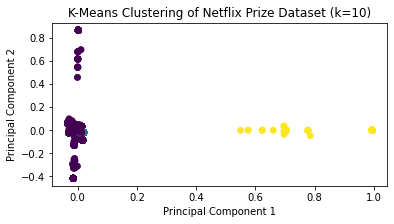

In [37]:
# Print the size of each cluster
print(df['cluster'].value_counts())

# Plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(norm_ratings_matrix)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Netflix Prize Dataset (k=10)')
#plt.rcParams['figure.figsize'] = [6, 3]
plt.show()

In [89]:
#save the kmeans model
import pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)